In [1]:
import osmnx as ox

In [2]:
cities=["Dallas, Texas, USA", "New York, New York, USA", "Washington, D.C., USA", "Baltimore, Maryland, USA",
         "Boston, Massachusetts, USA", "Denver, Colorado, USA", "Orlando, Florida, USA"]

Highways Within City - **Dallas**

In [3]:
dallas=ox.graph.graph_from_place("dallas",network_type="drive",
                          custom_filter='["highway"~"motorway"]')

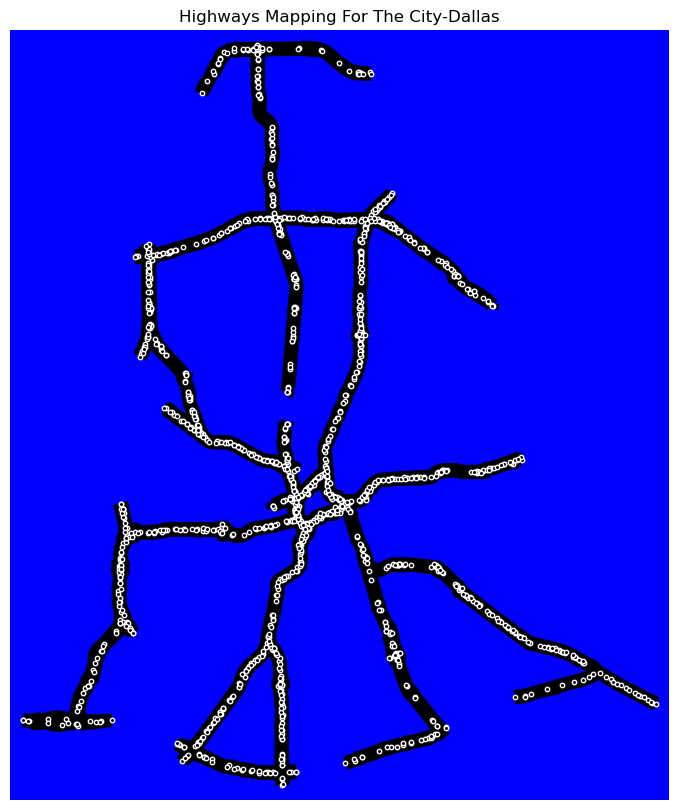

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'blue'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-Dallas")

# Plot the graph
ox.plot_graph(ox.project_graph(dallas), ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# # Set axis limits
# ax.set_xlim(bbox_config["West"], bbox_config["East"])
# ax.set_ylim(bbox_config["South"], bbox_config["North"])

# Show the plot

plt.show()


Highways within city - New York

In [5]:
newyork=ox.graph.graph_from_place("New York",network_type="drive",
                          custom_filter='["highway"~"motorway"]')

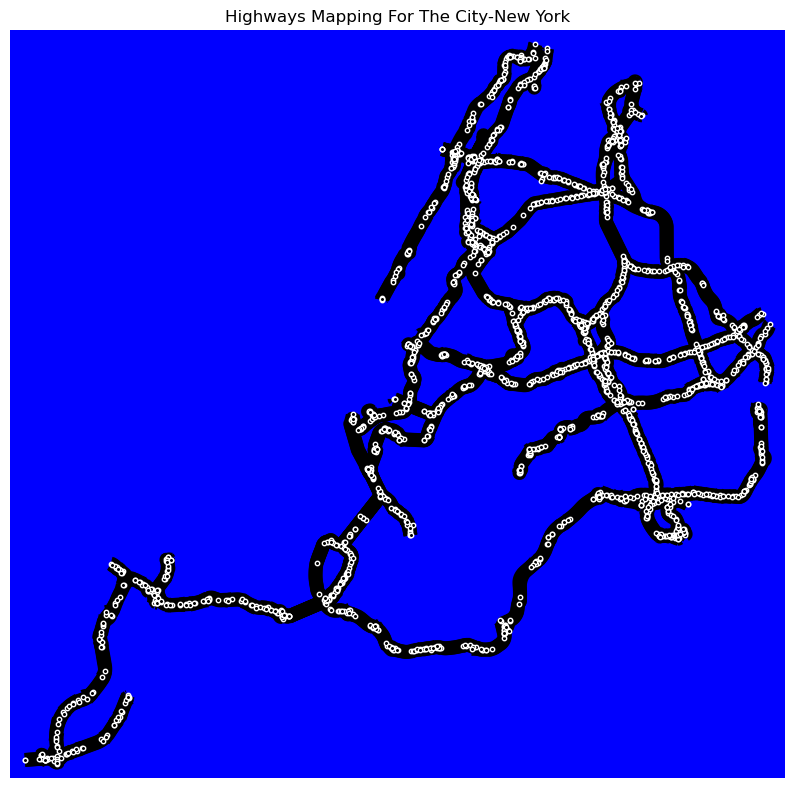

In [6]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-New York")

# Plot the graph
ox.plot_graph(newyork, ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()


In [7]:
cities[2]

'Washington, D.C., USA'

Highways within city - **Washington D.C.**

In [8]:
washingtonDC=ox.graph.graph_from_place("Washington, D.C., USA",network_type="drive",
                          custom_filter='["highway"~"motorway"]')

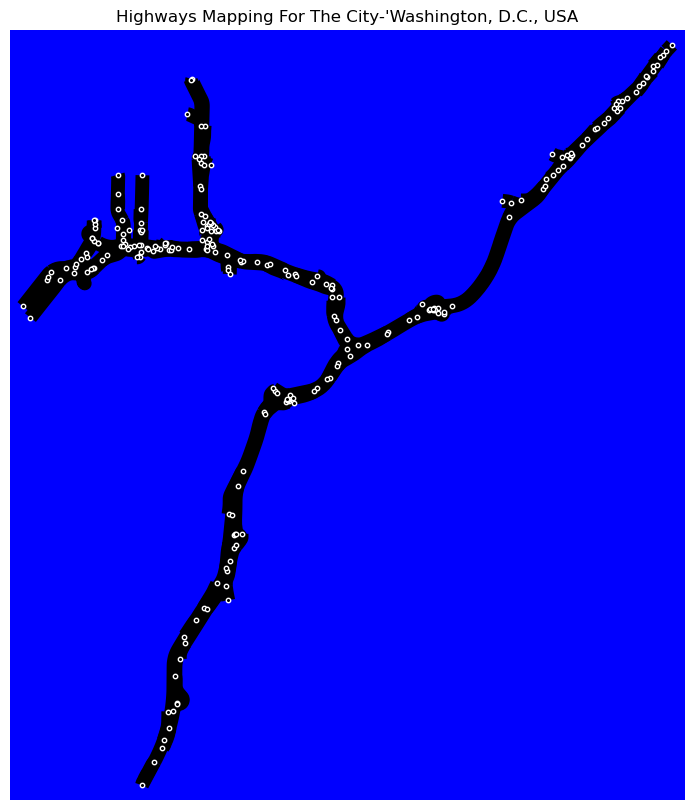

In [9]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-'Washington, D.C., USA")

# Plot the graph
ox.plot_graph(ox.project_graph(washingtonDC), ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()


In [10]:
cities[3]

'Baltimore, Maryland, USA'

In [11]:
baltimore=ox.graph.graph_from_place("Baltimore, Maryland, USA",network_type="drive",
                          custom_filter='["highway"~"motorway"]')

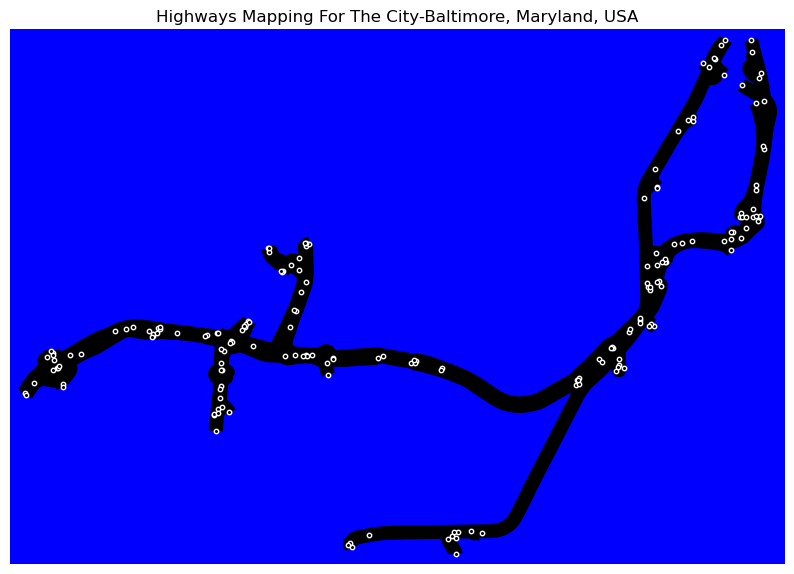

In [12]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-Baltimore, Maryland, USA")

# Plot the graph
ox.plot_graph(baltimore, ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()


In [13]:
cities[4]

'Boston, Massachusetts, USA'

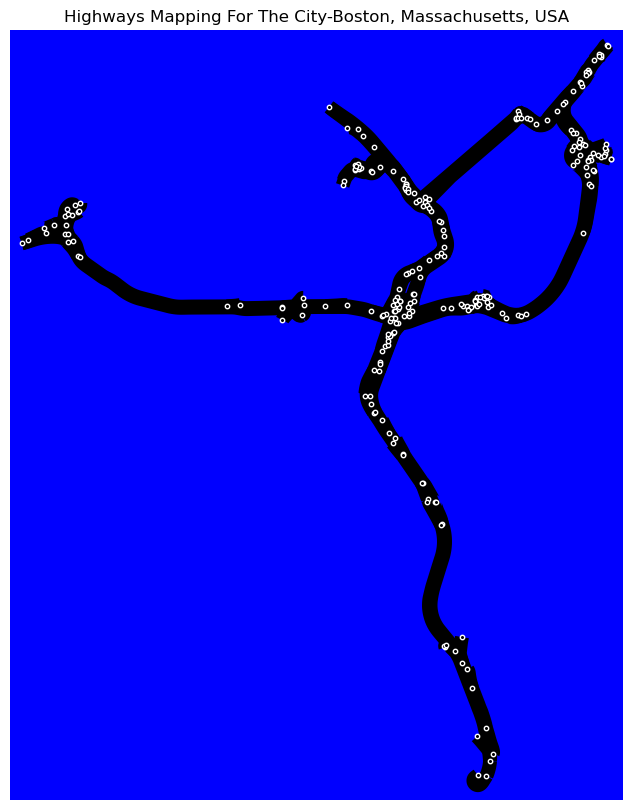

In [14]:
boston=ox.graph.graph_from_place(cities[4],network_type="drive",
                          custom_filter='["highway"~"motorway"]')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-"+cities[4])

# Plot the graph
ox.plot_graph(boston, ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()

In [16]:
cities[5]

'Denver, Colorado, USA'

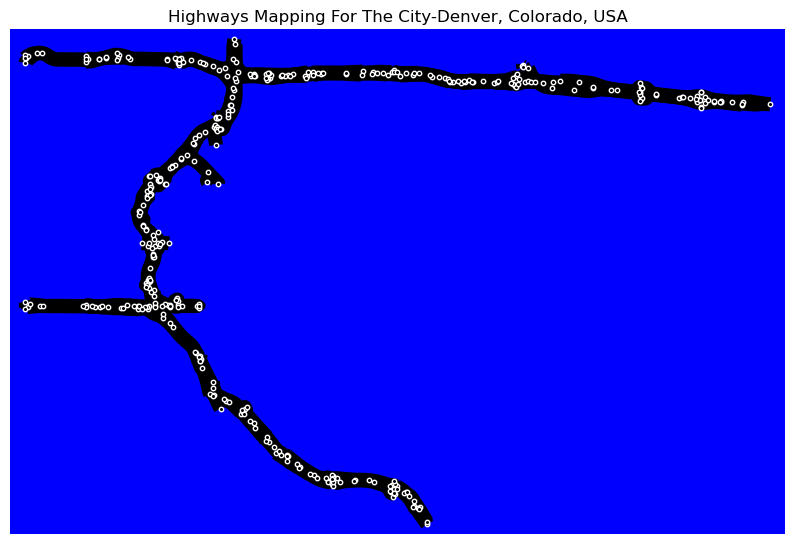

In [17]:
denver=ox.graph.graph_from_place(cities[5],network_type="drive",
                          custom_filter='["highway"~"motorway"]')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-"+cities[5])

# Plot the graph
ox.plot_graph(denver, ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()

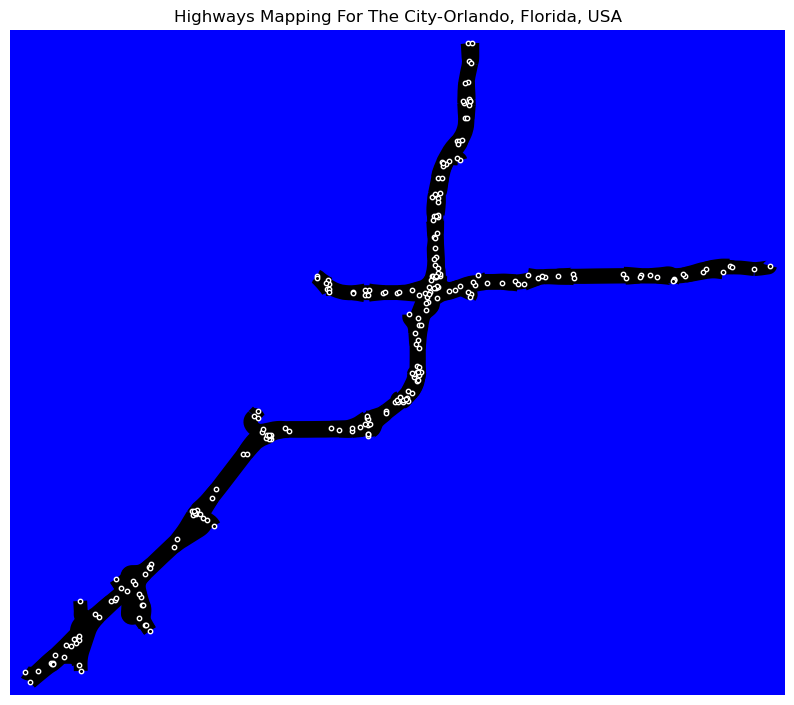

In [18]:
colorado=ox.graph.graph_from_place(cities[6],network_type="drive",
                          custom_filter='["highway"~"motorway"]')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Highways Mapping For The City-"+cities[6])

# Plot the graph
ox.plot_graph(colorado, ax=ax, node_size=10, edge_linewidth=10,
              node_color= "black",node_edgecolor="white",edge_color="black")

# Show the plot

plt.show()

Calculating Optimal Distance Connecting All Cities

In [32]:
# Collecting All Cities Together

combGraph=nx.MultiDiGraph()

cities = ["Dallas, Texas, USA", "New York, New York, USA", "Washington, D.C., USA", "Baltimore, Maryland, USA", "Boston, Massachusetts, USA", "Denver, Colorado, USA", "Orlando, Florida, USA"]

citiesMap={
    "Dallas, Texas, USA": (32.7767, -96.7970),
    "New York, New York, USA": (40.7128, -74.0060),
    "Washington, D.C., USA": (38.9072, -77.0369),
    "Baltimore, Maryland, USA": (39.2904, -76.6122),
    "Boston, Massachusetts, USA": (42.3601, -71.0589),
    "Denver, Colorado, USA": (39.7392, -104.9903),
    "Orlando, Florida, USA": (28.5383, -81.3792)
}

# Iterate over the cities and retrieve the drive network
for city in cities:
    graph = ox.graph_from_place(city, network_type="drive",custom_filter='["highway"~"motorway"]')
    combGraph = nx.compose(combGraph, graph)  

In [33]:
import osmnx as ox
import networkx as nx

def FindNode(y,x,combGraph):

    nodeRet=list(combGraph.nodes())[0]

    for node,attr in combGraph.nodes.data():

        if round(attr["y"],2)==round(32.7767,2) and round(attr["x"],2)==round(-96.7970,2):

            nodeRet=node
    

    return nodeRet

def calculate_distance(combGraph,city1, city2):
    # Use OpenStreetMap to calculate the distance between two cities
    #graph = ox.graph_from_place(city1 + ", " + city2, network_type="drive",custom_filter='["highway"~"motorway"]')

    c1Node=[]

    c1=citiesMap[city1]

    c2=citiesMap[city2]

    c1Node=FindNode(c1[0],c1[1],combGraph)

    c2Node=FindNode(c2[0],c2[1],combGraph)


    distance = nx.shortest_path_length(combGraph, c1Node, c2Node, weight="length")

    return distance

def optimize_route(start_city, cities):
    unvisited_cities = cities.copy()
    current_city = start_city
    optimized_route = [start_city]

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: calculate_distance(combGraph,current_city, city))
        optimized_route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    optimized_route.append(start_city)  # Return to the starting point
    return optimized_route

# Test the optimization algorithm
start_city = cities[0]
toCity = cities[1:]
optimized_route = optimize_route(start_city, toCity)
print(optimized_route)


['Dallas, Texas, USA', 'New York, New York, USA', 'Washington, D.C., USA', 'Baltimore, Maryland, USA', 'Boston, Massachusetts, USA', 'Denver, Colorado, USA', 'Orlando, Florida, USA', 'Dallas, Texas, USA']


In [34]:
optim_paths = []
for i in range(len(optimized_route)-1):
    path = [optimized_route[i], optimized_route[i+1]]
    optim_paths.append(path)

In [35]:
optim_paths

[['Dallas, Texas, USA', 'New York, New York, USA'],
 ['New York, New York, USA', 'Washington, D.C., USA'],
 ['Washington, D.C., USA', 'Baltimore, Maryland, USA'],
 ['Baltimore, Maryland, USA', 'Boston, Massachusetts, USA'],
 ['Boston, Massachusetts, USA', 'Denver, Colorado, USA'],
 ['Denver, Colorado, USA', 'Orlando, Florida, USA'],
 ['Orlando, Florida, USA', 'Dallas, Texas, USA']]

In [36]:
print("".ljust(100,"*"))
print("Showing Optimized Path For Driver To Complete His Delivery".rjust(70," "))
print("".ljust(100,"*"))

for iD,path in enumerate(optim_paths):

    print("From :(%s) >>Go To>> (%s)"%(path[0],path[1]))

    if iD<len(optim_paths)-1:

        print("Then,")

print("".ljust(100,"*"))



****************************************************************************************************
            Showing Optimized Path For Driver To Complete His Delivery
****************************************************************************************************
From :(Dallas, Texas, USA) >>Go To>> (New York, New York, USA)
Then,
From :(New York, New York, USA) >>Go To>> (Washington, D.C., USA)
Then,
From :(Washington, D.C., USA) >>Go To>> (Baltimore, Maryland, USA)
Then,
From :(Baltimore, Maryland, USA) >>Go To>> (Boston, Massachusetts, USA)
Then,
From :(Boston, Massachusetts, USA) >>Go To>> (Denver, Colorado, USA)
Then,
From :(Denver, Colorado, USA) >>Go To>> (Orlando, Florida, USA)
Then,
From :(Orlando, Florida, USA) >>Go To>> (Dallas, Texas, USA)
****************************************************************************************************


Optimal path: ['Dallas']
Optimal distance: 0


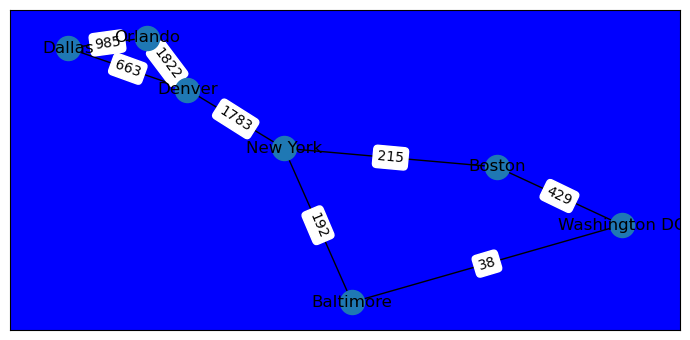

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# create graph object
G = nx.Graph()

# add nodes for each city
G.add_nodes_from(['New York', 'Baltimore', 'Washington DC', 'Boston', 'Denver', 'Orlando', 'Dallas'])

# add edges between cities with their distances
G.add_edge('New York', 'Baltimore', weight=192)
G.add_edge('Baltimore', 'Washington DC', weight=38)
G.add_edge('New York', 'Boston', weight=215)
G.add_edge('Boston', 'Washington DC', weight=429)
G.add_edge('Denver', 'Dallas', weight=663)
G.add_edge('Denver', 'Orlando', weight=1822)
G.add_edge('Dallas', 'Orlando', weight=985)
G.add_edge('New York', 'Denver', weight=1783)

# find shortest path
path = nx.shortest_path(G, 'Dallas', 'Dallas', weight='weight')

# find optimal distance
distance = nx.shortest_path_length(G, 'Dallas', 'Dallas', weight='weight')

# print results
print('Optimal path:', path)
print('Optimal distance:', distance)




# draw graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_labels(G, pos)
plt.show()

In [57]:
# distance between the cities
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# create graph object
G = nx.Graph()

# add nodes for each city
G.add_nodes_from(['New York', 'Baltimore', 'Washington DC', 'Boston', 'Denver', 'Orlando', 'Dallas'])

# add edges between cities with their distances
G.add_edge('New York', 'Baltimore', weight=192)
G.add_edge('Baltimore', 'Washington DC', weight=38)
G.add_edge('New York', 'Boston', weight=215)
G.add_edge('Boston', 'Washington DC', weight=429)
G.add_edge('Denver', 'Dallas', weight=663)
G.add_edge('Denver', 'Orlando', weight=1822)
G.add_edge('Dallas', 'Orlando', weight=985)
G.add_edge('New York', 'Denver', weight=1783)

# calculate optimal distances between all pairs of cities
distances = dict(nx.all_pairs_dijkstra_path_length(G))

for start in distances:
    for end in distances[start]:
        print(f"Optimal distance from {start} to {end}: {distances[start][end]}")


# print results
for source, targets in distances:
    for target, distance in targets.items():
        print(f"Optimal distance between {source} and {target}: {distance}")

# draw graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_labels(G, pos)
plt.show()

Optimal distance from New York to New York: 0
Optimal distance from New York to Baltimore: 192
Optimal distance from New York to Boston: 215
Optimal distance from New York to Washington DC: 230
Optimal distance from New York to Denver: 1783
Optimal distance from New York to Dallas: 2446
Optimal distance from New York to Orlando: 3431
Optimal distance from Baltimore to Baltimore: 0
Optimal distance from Baltimore to Washington DC: 38
Optimal distance from Baltimore to New York: 192
Optimal distance from Baltimore to Boston: 407
Optimal distance from Baltimore to Denver: 1975
Optimal distance from Baltimore to Dallas: 2638
Optimal distance from Baltimore to Orlando: 3623
Optimal distance from Washington DC to Washington DC: 0
Optimal distance from Washington DC to Baltimore: 38
Optimal distance from Washington DC to New York: 230
Optimal distance from Washington DC to Boston: 429
Optimal distance from Washington DC to Denver: 2013
Optimal distance from Washington DC to Dallas: 2676
Optim

ValueError: too many values to unpack (expected 2)